En este Tp hicimos un modelo de una red neuronal CNN para poder clasificar imagenes del dataset Fashion MNIST que tiene articulos de moda. Este tiene 10 categorias y el objetivo de este modelo es que aprenda a identificar patrones visuales en cada imagen y pueda predecir la categoria que tiene cada articulo.

In [15]:
#Instalo las librerias
! pip install tensorflow 
! pip install keras-visualizer 
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [16]:
#importo librerias
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from keras_visualizer import visualizer

In [17]:
#Creo el dataset
#Cargo el dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Pongo los valores de los pixeles entre [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

#Verifico las dimensiones
print(f"Dimensiones de entrenamiento: {X_train.shape}")
print(f"Dimensiones de prueba: {X_test.shape}")

Dimensiones de entrenamiento: (60000, 28, 28)
Dimensiones de prueba: (10000, 28, 28)


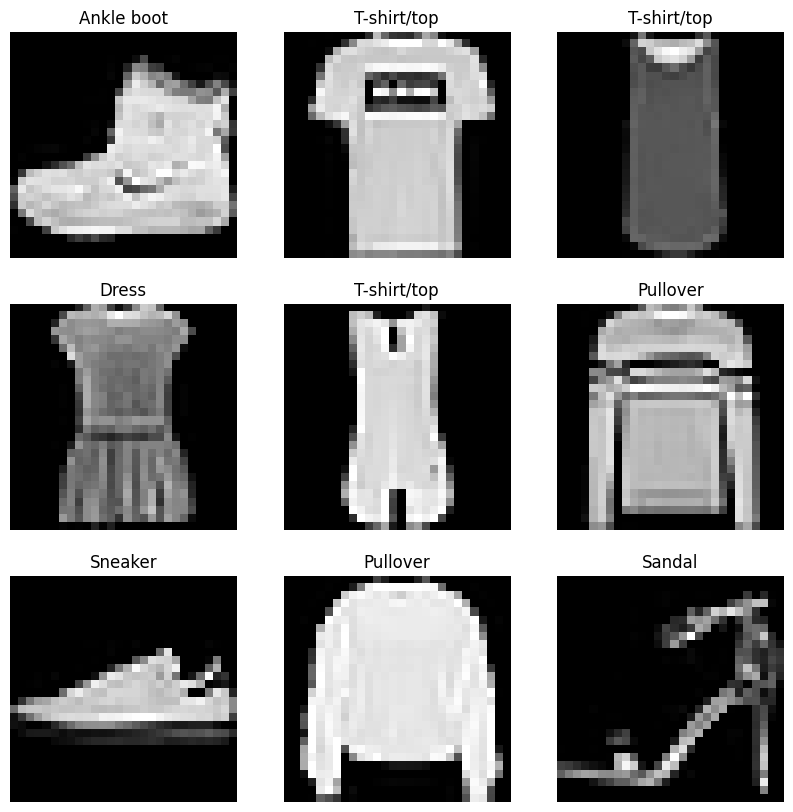

In [18]:
#Pongo las categorias
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Muestro imagenes de cada una de la categoria
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [19]:
#Construyo el modelo
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

#Resumimos el modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,906 (3.42 MB)

 Trainable params: 896,906 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
#Compilo y entreno el modelo
#Aca lo compilo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Aca lo entreno
history = model.fit(X_train[..., np.newaxis], y_train, epochs=10,
                    validation_data=(X_test[..., np.newaxis], y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.7638 - loss: 0.6610 - val_accuracy: 0.8810 - val_loss: 0.3284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.8873 - loss: 0.3145 - val_accuracy: 0.9050 - val_loss: 0.2608
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9054 - loss: 0.2633 - val_accuracy: 0.9101 - val_loss: 0.2460
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9180 - loss: 0.2244 - val_accuracy: 0.9112 - val_loss: 0.2532
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9271 - loss: 0.1978 - val_accuracy: 0.9114 - val_loss: 0.2422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9325 - loss: 0.1786 - val_accuracy: 0.9164 - val_loss: 0.2364
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9412 - loss: 0.1575 - val_accuracy: 0.9197 - val_loss: 0.2482
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9483 -

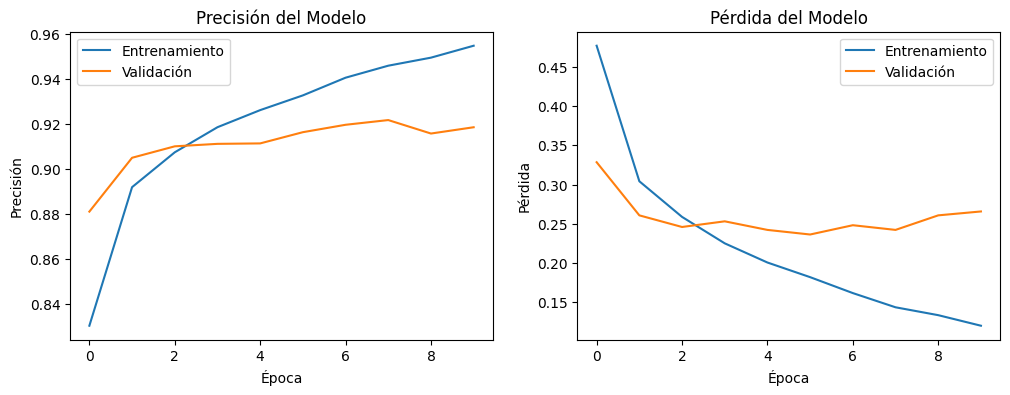

In [21]:
#Grafico la presicion y la perdida
plt.figure(figsize=(12, 4))

#Aca la presicion
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label ='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo')

#Aca la perdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida del Modelo')

#Aca lo muestro
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9194 - loss: 0.2731
Precisión en el conjunto de prueba: 0.92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


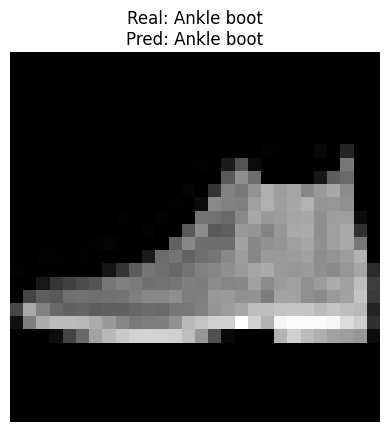

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


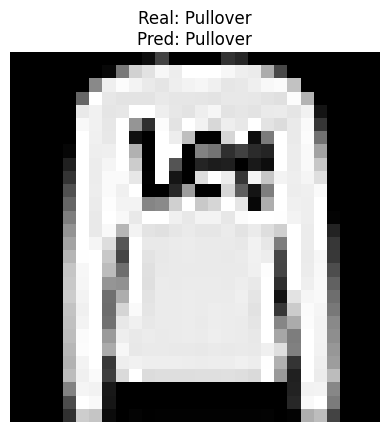

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


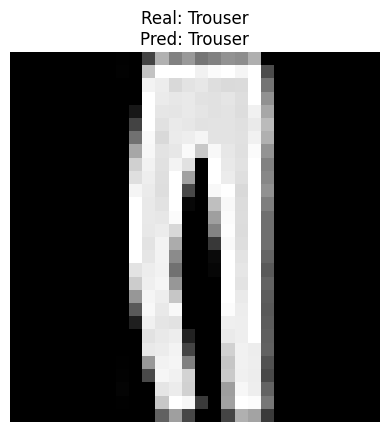

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


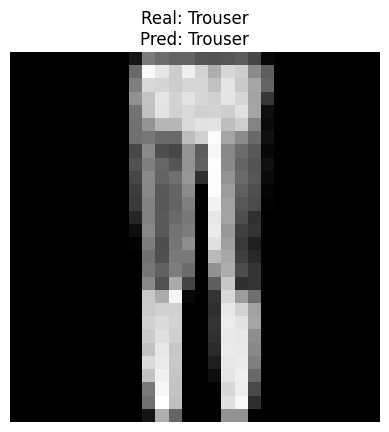

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


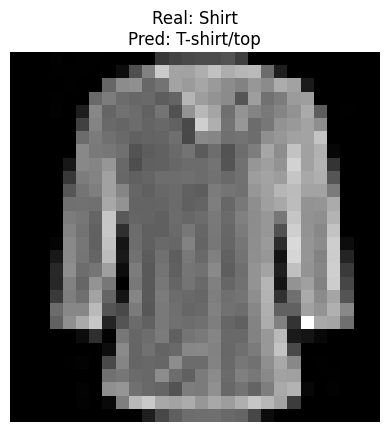

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


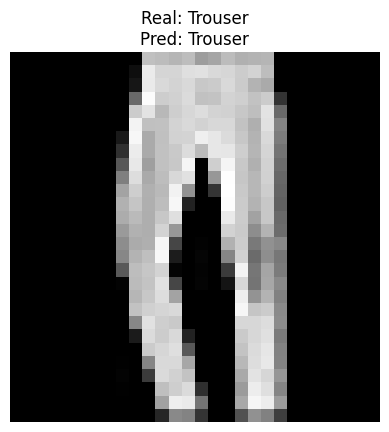

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


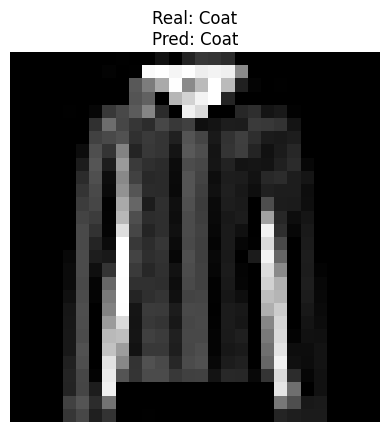

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


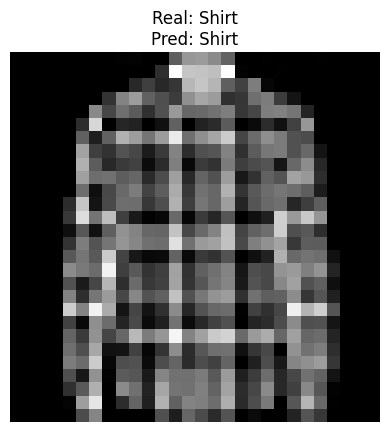

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


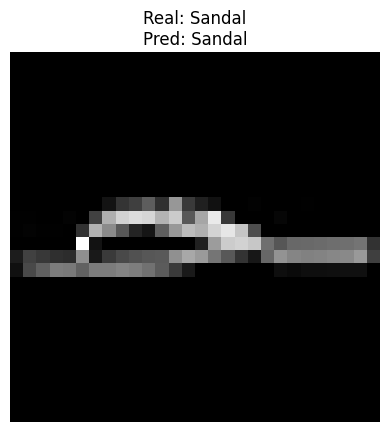

In [22]:
#Evaluo el modelo
test_loss, test_accuracy = model.evaluate(X_test[..., np.newaxis], y_test)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

#Muestro las predicciones que hizo
for images, labels in zip(X_test[:9], y_test[:9]):
    predictions = model.predict(images[np.newaxis, ..., np.newaxis])
    predicted_class = np.argmax(predictions)

    plt.imshow(images, cmap='gray')
    plt.title(f"Real: {class_names[labels]}\nPred: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()

Nosotras pudimos lograr implementar y entrenar un modelo CNN que pueda clasificar imagenes con buena presicion. Este modelo lo que hace es capturar los patrones visuales que sean relevantes y muestra en que categoria estan. :)